# Taller práctico: Segmentación de imágenes


En este taller, aplicaremos las técnicas de segmentación de imágenes que hemos aprendido en clase. Trabajaremos con la imagen de algún objeto que se quiera segmentar alrededor del campus. <b> Importante: La foto debe ser tomada por usted. </b>

## Índice

1. Importar bibliotecas y cargar la imagen
2. Preprocesamiento de la imagen
3. Umbralización
4. Segmentación basada en bordes
5. Segmentación basada en regiones
6. Comparación y discusión de resultados

## 1. Importar bibliotecas y cargar la imagen

Comencemos importando las bibliotecas necesarias y cargando la imagen que deseamos segmentar.

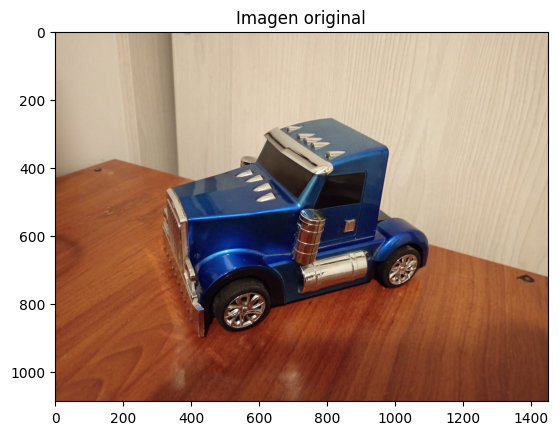

In [99]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reemplazar 'path/to/your/image.jpg' con la ruta de la imagen tomada por su equipo
img = cv2.imread('Carrito.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB

plt.imshow(img)
plt.title('Imagen original')
plt.show()

In [100]:
# Funciones auxiliares para plotear las imagenes

def show_image_and_histogram(img_gray):
    """
    Muestra la imagen y su histograma en dos figuras.

    Parámetros:
    img_gray: Imagen en escala de grises

    """

    # Create a figure with two subplots, one for the image and one for the histogram
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Show the image in the first subplot
    ax1.imshow(img_gray, cmap = "gray")
    ax1.set_title('Imagen')

    # Calculate the histogram of the image
    hist, bins = np.histogram(img_gray.ravel(), 256, [0, 256], density= True)

    # Show the histogram in the second subplot
    ax2.plot(hist)
    ax2.set_title('Histograma')
    ax2.set_xlim([0, 256])

    # Display the plot
    plt.show()

## 2. Preprocesamiento de la imagen

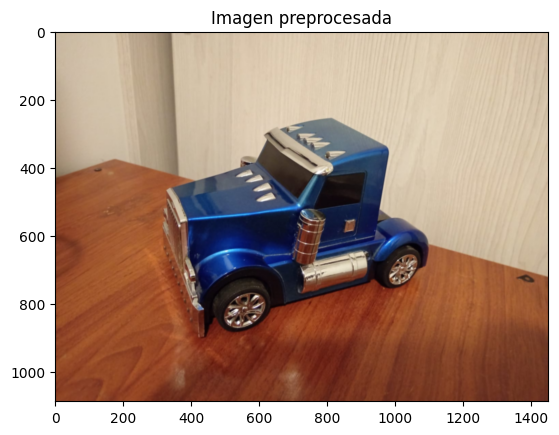

In [101]:
# Como preprocesamiento realizamos un filtro gaussiano para eliminar el ruido de la imagen
img = cv2.imread('Carrito.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB

# Aplicar filtro gaussiano
img = cv2.GaussianBlur(img, (5, 5), 0)

plt.imshow(img)
plt.title('Imagen preprocesada')
plt.show()

Antes de aplicar las técnicas de segmentación, es posible que necesitemos realizar un preprocesamiento en la imagen para mejorar los resultados.

Notemos que dado que se intentó tomar la imagen original con muy buenas condiciones, el filtro Gaussiano no es de mucha ayuda en la mejora de la foto.

## 3. Umbralización

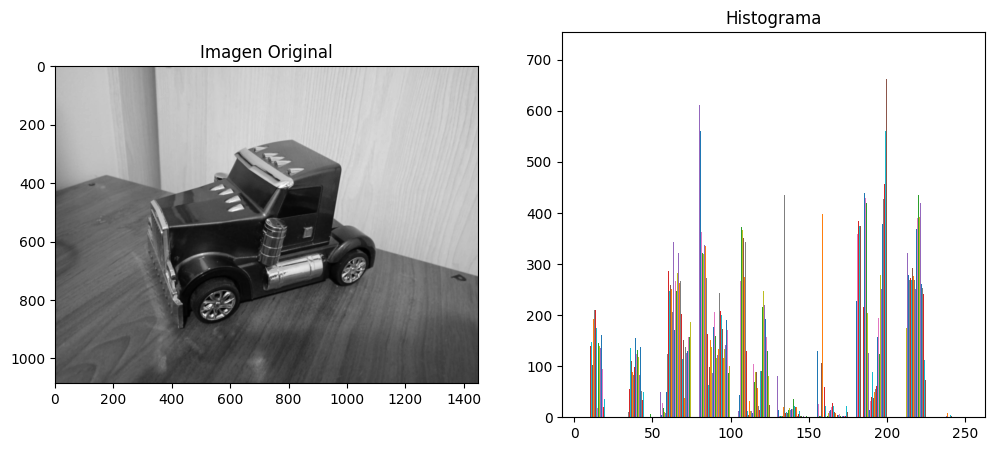

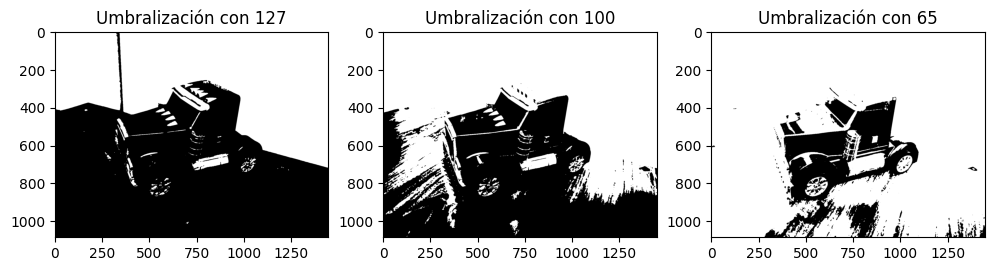

In [102]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY).astype(np.uint8)

#Generar subplot 1x2 para mostrar imagen de entrada e histograma
fig, ax = plt.subplots(1,2, figsize=(12, 5))
ax[0].set_title('Imagen Original')
ax[0].imshow(img_gray, cmap='gray')
ax[1].set_title('Histograma')
ax[1].hist(img_gray);


#Realizar disintos threshold a la imagen a partir de distintos valores mínimos
thresholded1 = img_gray > 127
thresholded2 = img_gray > 100
thresholded3 = img_gray > 65

#Generar un subplot 1x3 para mostrar las umbralizaciones y compararlas
fig, ax = plt.subplots(1,3, figsize=(12, 8))
ax[0].set_title('Umbralización con 127')
ax[0].imshow(thresholded1, cmap="gray");
ax[1].set_title('Umbralización con 100')
ax[1].imshow(thresholded2, cmap="gray");
ax[2].set_title('Umbralización con 65')
ax[2].imshow(thresholded3, cmap="gray");

Como notamos que la imagen tiene dos fondos distintos, tratemos de usar una umbralización múltiple para segmentar la imagen.

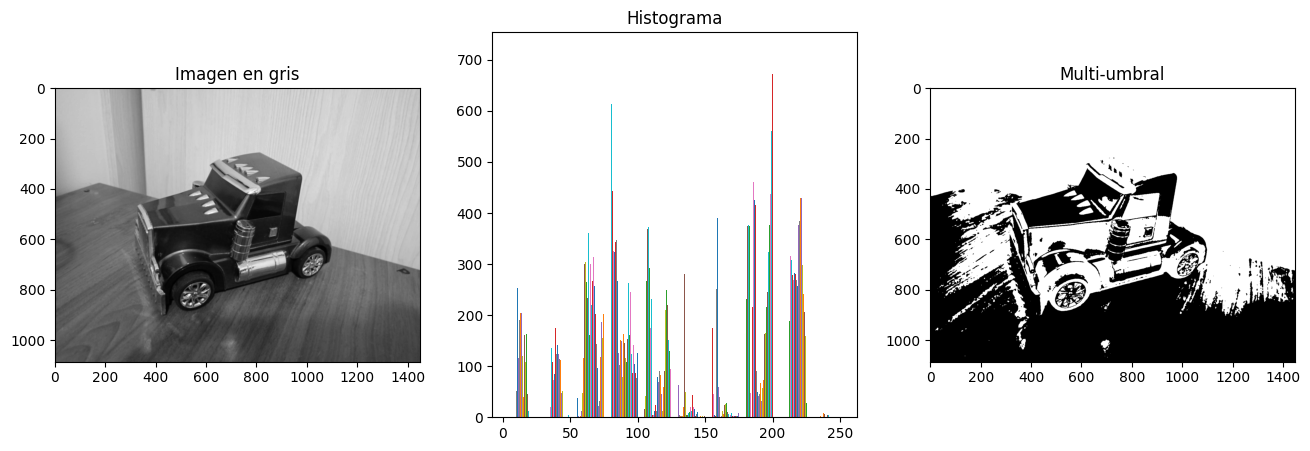

In [103]:
#Leer imagen de entrada con tipo de dato uint8
img_multi = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY).astype(np.uint8)

#Crear una copia de la imagen
res = img_multi.copy()
#Asignar para todos los valores menores a 100 el valor 75
res[res < 35 ] = 255
#Asignar para valores entre 100 y 175 el valor 128
res[(res >= 35) & (res < 105)] = 0
#Asignar para cualquier valor mayor a 175 el valor 255
res[res >= 105] = 255


#Generar un subplot 1x3 que muestre imagen en gris, histograma y multi-umbralización
fig, ax = plt.subplots(1,3, figsize=(16, 5))

ax[0].set_title('Imagen en gris')
ax[0].imshow(img_multi, cmap='gray')
ax[1].set_title('Histograma')
ax[1].hist(img_multi)
ax[2].set_title('Multi-umbral')
ax[2].imshow(res, cmap='gray')

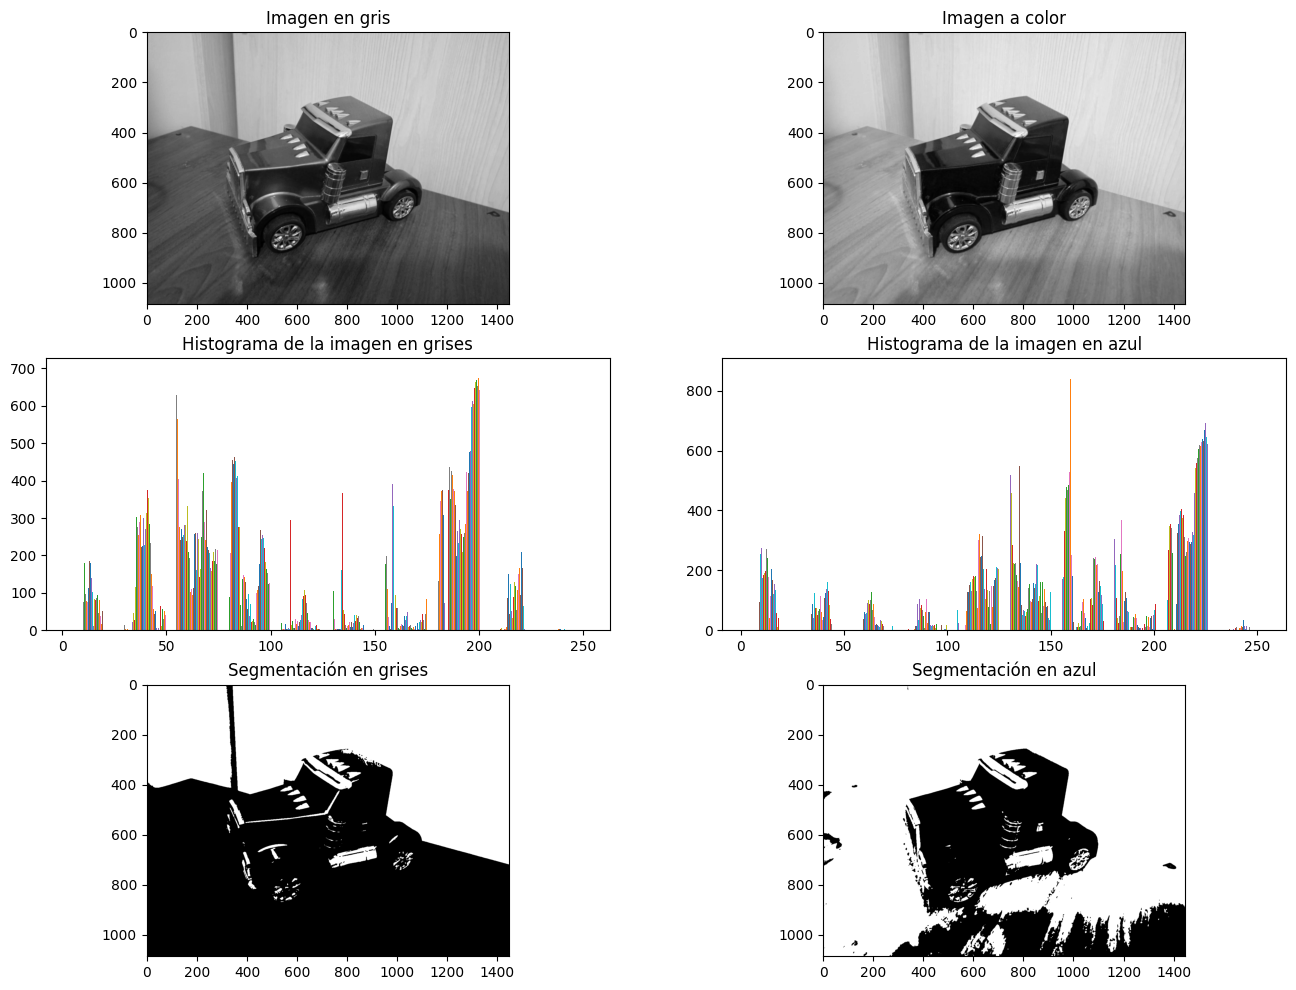

In [104]:
#Leer imagen de entrada en escala de grises y a color
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.uint8)
img_color = cv2.cvtColor(img, cv2.COLOR_RGB2BGR).astype(np.uint8)

#Tomar el canal azul del RGB
blue = img_color[:,:,2]

#Umbrazizar las imágenes en gris y en el canal rojo
thresh_gray = gray > 127
thresh_blue = blue > 127

#Generar un subplot 3x2 que muestre las umbralizaciones y sus histogramas
fig, ax = plt.subplots(3,2, figsize=(16, 12))


ax[0][0].set_title('Imagen en gris')
ax[0][0].imshow(gray, cmap='gray')
ax[0][1].set_title('Imagen a color')
ax[0][1].imshow(blue, cmap='gray')
ax[1][0].set_title('Histograma de la imagen en grises')
ax[1][0].hist(gray)
ax[1][1].set_title('Histograma de la imagen en azul')
ax[1][1].hist(blue);


ax[2][0].set_title('Segmentación en grises')
ax[2][0].imshow(thresh_gray, cmap='gray')
ax[2][1].set_title('Segmentación en azul')
ax[2][1].imshow(thresh_blue, cmap='gray')

## 4. Segmentación basada en bordes

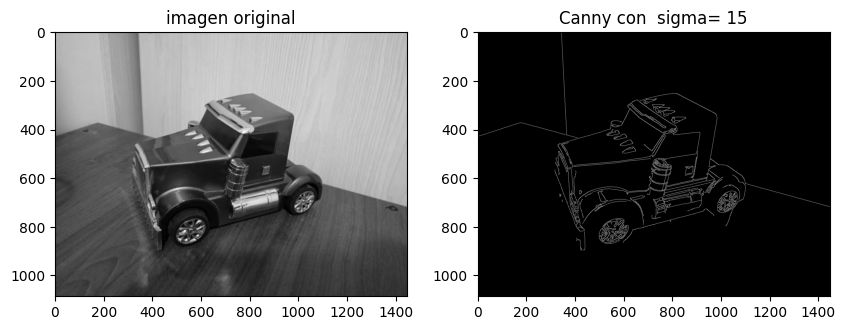

In [105]:
# Convertir la imagen a escala de grises
gray_bordes = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Definir el sigma
sigma = 15

#Suavizamos la imagen para eliminar ruido (aplicar filtro Gaussiano)
result = cv2.GaussianBlur(gray_bordes, (3,3), sigma)

# Aplicar la detección de bordes de Canny 0 150
edges = cv2.Canny(result, 0, 150)

#Generar un subplot 1x2 que muestre imagen original y Canny
fig2, ax = plt.subplots(1,2, figsize=(10, 7))
ax[0].set_title('imagen original')
ax[0].imshow(gray_bordes, cmap='gray')
ax[1].set_title('Canny con  sigma= '+str(sigma))
ax[1].imshow(edges, cmap='gray')

## 5. Segmentación basada en regiones

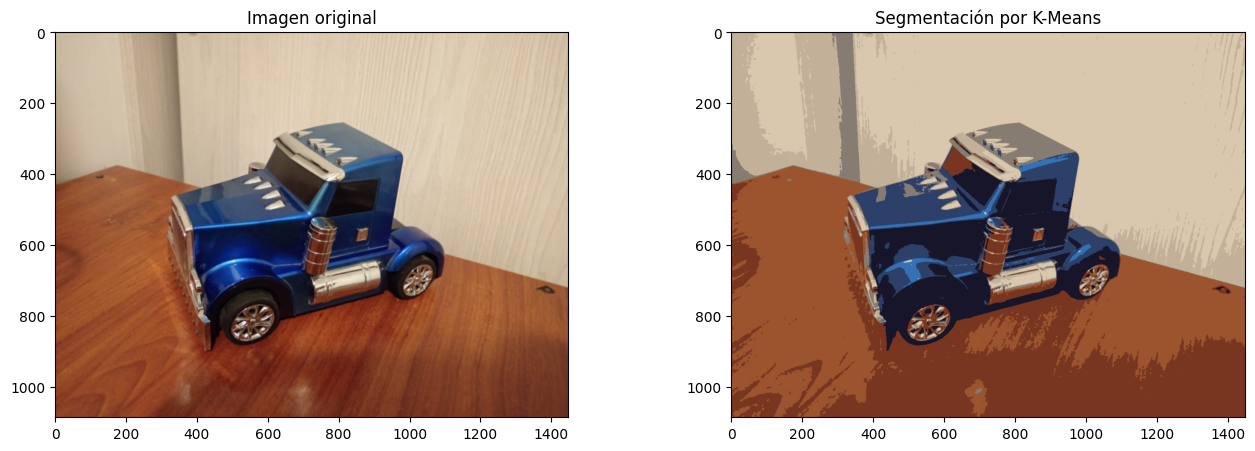

In [106]:
#Reorganizar la imagen de entrada y darle unidades flotantes
Z = img.reshape((-1,3))
Z = np.float32(Z)

# definir criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

#Volver a tipo de dato uint8 y mostrar la imagen
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

#Generar un subplot 1x2 y mostrar imagen junto a segmentación por K-means
fig, ax = plt.subplots(1,2, figsize=(16, 5))

ax[0].set_title('Imagen original')
ax[0].imshow(img, cmap='gray')
ax[1].set_title('Segmentación por K-Means')
ax[1].imshow(res2, cmap='gray')
#

## 6. Comparación y discusión de resultados

Una vez que hayas aplicado las diferentes técnicas de segmentación en la imagen, compara los resultados y discute en grupo cuál técnica funcionó mejor para tu imagen específica. Ten en cuenta los desafíos y limitaciones que enfrentaste al aplicar cada técnica.

- <b> ¿Qué técnica de segmentación funcionó mejor para tu imagen? </b>
- <b> ¿Cuáles fueron los desafíos y limitaciones que enfrentaste al aplicar cada técnica? </b>
- <b> ¿Cómo podrías mejorar los resultados de la segmentación en el futuro? </b>

Sin duda alguna, la técnica de segmentación que mejor funcionó para mi imagen fue la segmentación por bordes, pues logro resaltar el objeto de interés en la imagen, aunque también detallo los bordes de la mesa en la cual estaba el mismo, lo cual asumo que un poco más de procesamiento podría resultar en solo el camioncito. Ahora bien, otro de los métodos que funcionó bien, luego de muchos intentos, fue la segmentación por umbralización, pues hicimos uso de la propiedad azul del camión para obtener de cierta manera, un objeto bien destacado, sin embargo, una pequeña sombra en la parte inferior también quedó detallada, esta podría ser eliminada intuitivamente con grafos o algún algoritmo parecido. Finalmente, la segmentación por regiones, a pesar de que segmenta el objeto y lo pone en bordes bastante notorios, los brillos o reflejos del objeto logran confundir ciertos elementos del mismo.

Varios de los desafíos y limitaciones encontradas al aplicar las técnicas fue el manejo de los reflejos,, brillos y sombras de la imagen. En cuanto a la umbralización fue bastante complejo el hecho de que la imagen no tuviera un fondo homogéneo, lo cual dificultó la elección de un umbral adecuado y nos llevó un poco a la multiumbralización, que mejoró un poco, pero qué dado uno de los fondos, su opacidad parecida a la del objeto de interés hacía que el umbral tomara ambos elementos, luego de esto usamos la propiedad azul del objeto para segmentar, pero la sombra en la parte inferior del objeto también fue tomada como parte del umbral escogido, por las mismas tonalidades. En cuanto a la segmentación por regiones, los brillos y reflejos del objeto confundieron un poco al algoritmo, haciendo que en partes se tomaran algunas regiones distintas del objeto como parte del mismo. Finalmente, en cuanto a la segmentación por bordes, se limitó simplemente a jugar con el sigma del filtro gaussiano y los parámetros de Canny, lo cual resultó en un gran resultado, a pesar se tomara un poco de la mesa que también estaba en la imagen.

Con respecto a posibles mejoras, intuitivamente y por lo que he escuchado del tema, el uso de grafos podría ayudarnos a terminar de segmentar la imagen en los dos primeros métodos. Además de esto, podríamos buscar más a fondo un preprocesamiento que nos ayude a mitigar esta sombra o manualmente buscar cambiar sus valores y aclarar este pedazo de la imagen.